In [56]:
import pandas as pd
pd.options.mode.chained_assignment = None

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from wordcloud import WordCloud
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [57]:
import sys
sys.path.insert(0, '../_functions_')

from functions_eda import *

In [58]:
babies = pd.read_csv('../Final Project/datasets/BD_Final Project - nascuts_vius_BCN.csv')

## Data cleaning and exploring

In [59]:
babies.info()
# the values are all integers, so this is what I need.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    49 non-null     int64
 1   Boys    49 non-null     int64
 2   Girls   49 non-null     int64
 3   Total   49 non-null     int64
dtypes: int64(4)
memory usage: 1.7 KB


In [60]:
babies.head()

,Year,Boys,Girls,Total
0,2023,5874,5504,11378
1,2022,6090,5511,11601
2,2021,6135,5840,11975
3,2020,6312,5967,12279
4,2019,6626,6273,12899


In [61]:
# Checking the shape of the dataframe
babies.shape

(49, 4)

In [62]:
# There aren't any NaN values
babies.isnull().sum()

Year     0
Boys     0
Girls    0
Total    0
dtype: int64

## 1 - First I want to see the evolution of babies born in Barcelona through the years. For that, I'm going to try different plots to see each one shows better the data.

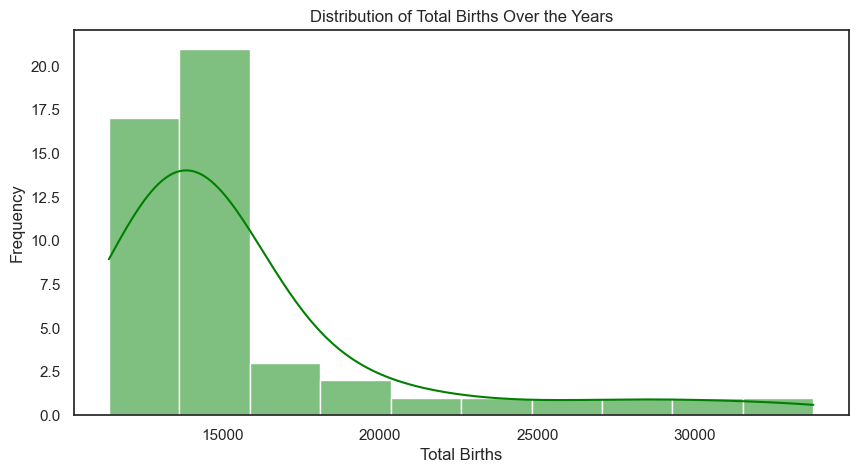

In [63]:
# Seaborn Histogram - this one won't work because I can't add the variable Year
plt.figure(figsize=(10,5))
sns.histplot(babies["Total"], bins=10, kde=True, color="green")
plt.xlabel("Total Births")
plt.ylabel("Frequency")
plt.title("Distribution of Total Births Over the Years")
plt.show()



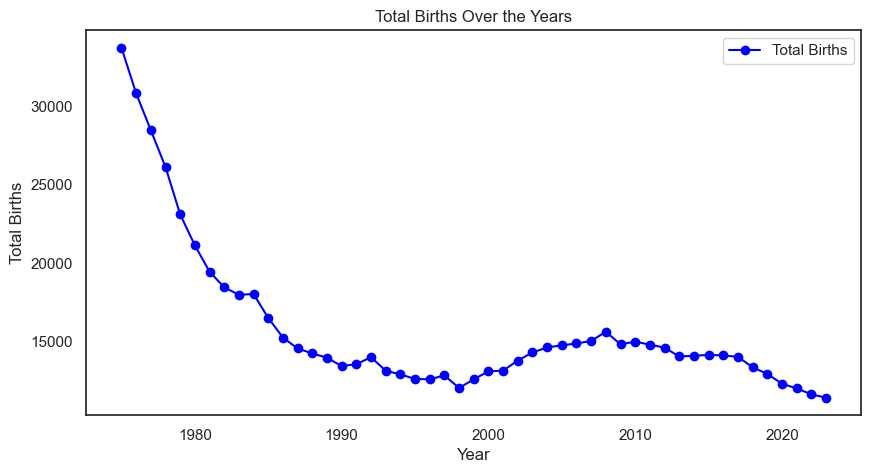

In [64]:
# Matplotlib Alternative (Line Plot)
plt.figure(figsize=(10,5))
plt.plot(babies["Year"], babies["Total"], marker="o", linestyle="-", color="blue", label="Total Births")
plt.xlabel("Year")
plt.ylabel("Total Births")
plt.title("Total Births Over the Years")
plt.legend()
plt.grid(False)
plt.show()

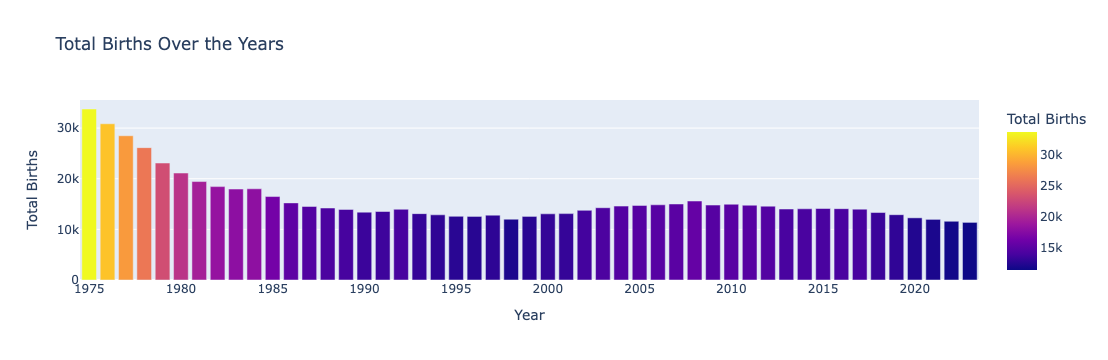

In [65]:
# Plotly Alternative (Interactive Bar Chart) - I'll use this one, maybe after I tuned it
fig = px.bar(babies, x="Year", y="Total", title="Total Births Over the Years", labels={"Total": "Total Births"}, color="Total")
fig.show()

## 2 - Second I'll present this data into more detail, just out of curiosity: boys vs girls 

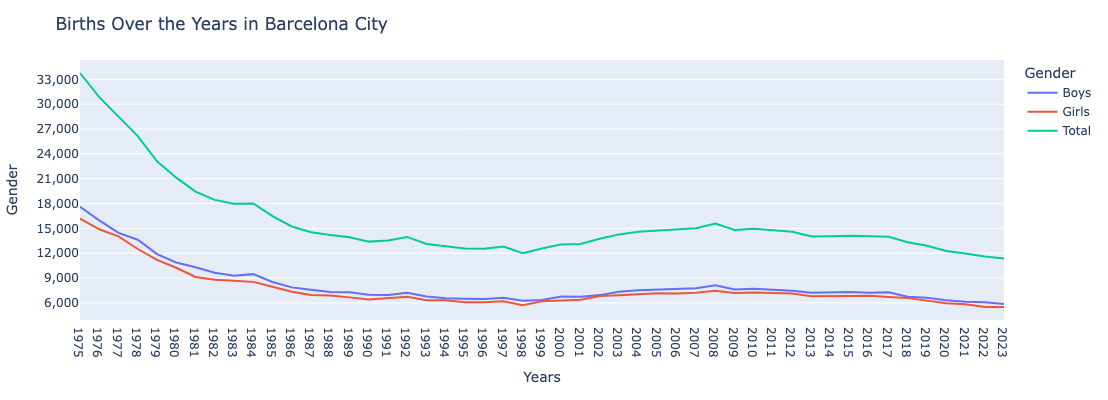

In [159]:
# With the total variable
# Step 1: Create the traces of the plots
fig = px.line(babies, 
              x = "Year", 
              y=["Boys", "Girls", 'Total']
             )

# Update the layout of the plot with a title
fig.update_layout(title_text='Births Over the Years in Barcelona City',
                 xaxis_title='Years',
                 yaxis_title='Gender',
                 legend_title='Gender',
                width=1000,  # Set the width of the plot (increase for wider)
                height=400   # Set the height of the plot (increase for taller)
                 )

# Ensure every year is displayed on the x-axis
fig.update_xaxes(
    dtick=1,  # Forces tick marks to appear every 1 year
    tickmode="linear",
    showgrid=False)

# Make the y-axis more detailed
fig.update_yaxes(
    dtick=3000, # Adjusts tick marks to show every 3,000 births
    tickformat=",",  # Adds comma formatting to large numbers
    showgrid=True  # Optional: shows grid lines for better readability
)

# Step 2: Show the plot
fig.show()

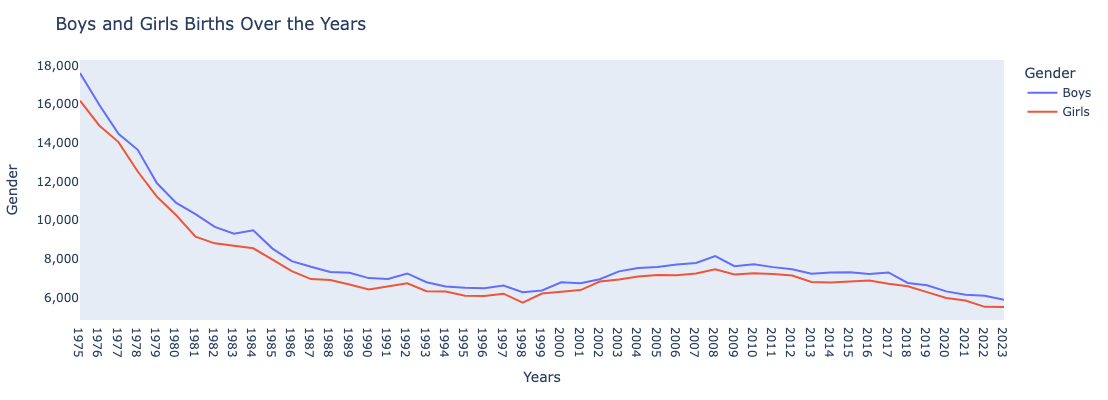

In [153]:
# Without the total variable
# Create the traces of the plots
fig = px.line(babies, 
              x = "Year", 
              y=["Boys", "Girls"])


# Update the layout of the plot with a title
fig.update_layout(title_text='Boys and Girls Births Over the Years',
                 xaxis_title='Years',
                 yaxis_title='Gender',
                 legend_title='Gender',
                width=1000,  # Set the width of the plot (increase for wider)
                height=400   # Set the height of the plot (increase for taller)
                 )

# Ensure every year is displayed on the x-axis
fig.update_xaxes(
    dtick=1,  # Forces tick marks to appear every 1 year
    tickmode="linear",
    showgrid=False)

# Make the y-axis more detailed
fig.update_yaxes(
    dtick=2000, # Adjusts tick marks to show every 2,000 births
    tickformat=",",  # Adds comma formatting to large numbers
    showgrid=False  # Optional: shows grid lines for better readability
)

# Show the plot
fig.show()

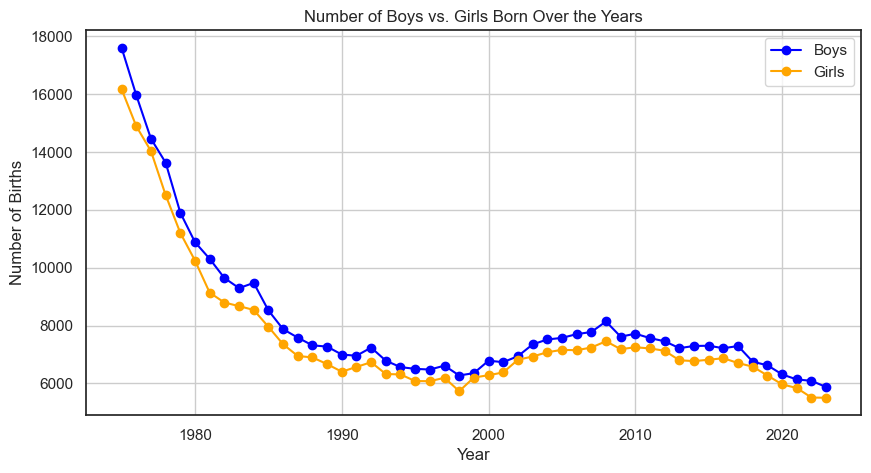

In [143]:
# Other options:
# Line Plot (Matplotlib)
plt.figure(figsize=(10,5))
plt.plot(babies["Year"], babies["Boys"], marker="o", linestyle="-", label="Boys", color="blue")
plt.plot(babies["Year"], babies["Girls"], marker="o", linestyle="-", label="Girls", color="orange")
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Number of Boys vs. Girls Born Over the Years")
plt.legend()
plt.grid(True)
plt.show()

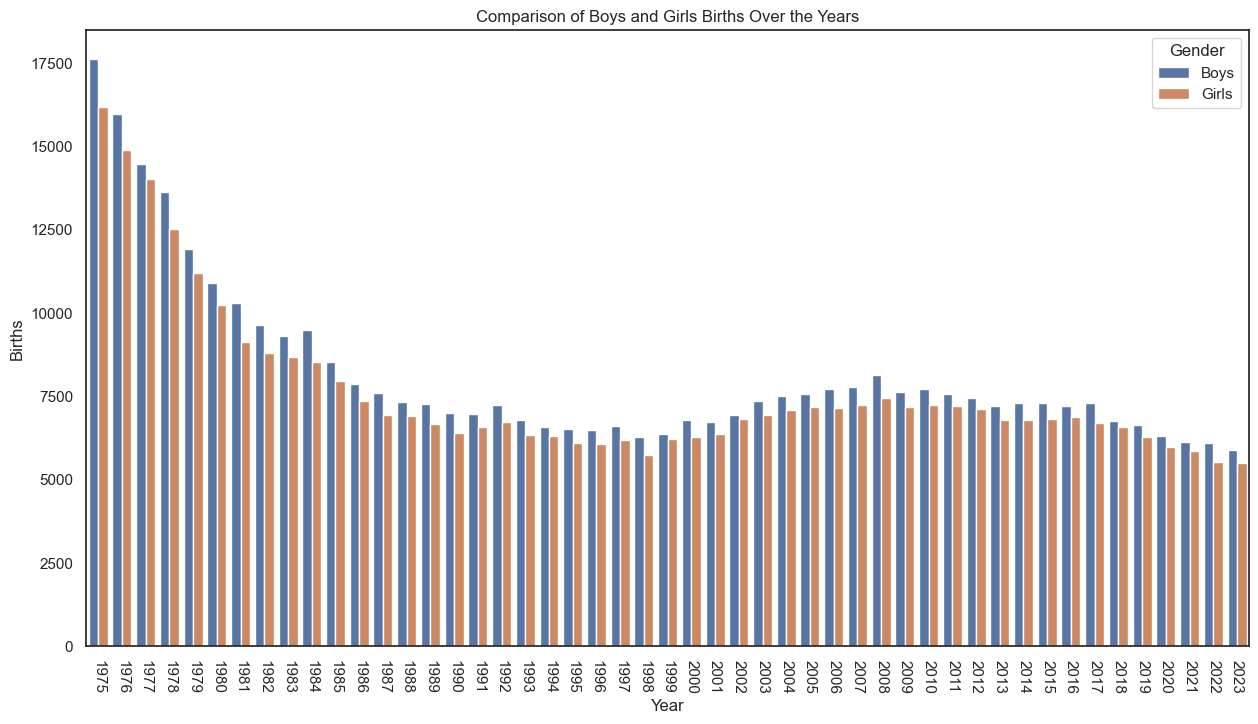

In [79]:
# Grouped Bar Chart (Seaborn)
plt.figure(figsize=(15,8))
b_melted = babies.melt(id_vars="Year", value_vars=["Boys", "Girls"], var_name="Gender", value_name="Births")
sns.barplot(x="Year", y="Births", hue="Gender", data=b_melted)
plt.title("Comparison of Boys and Girls Births Over the Years")
plt.xticks(rotation=-90)
plt.show()

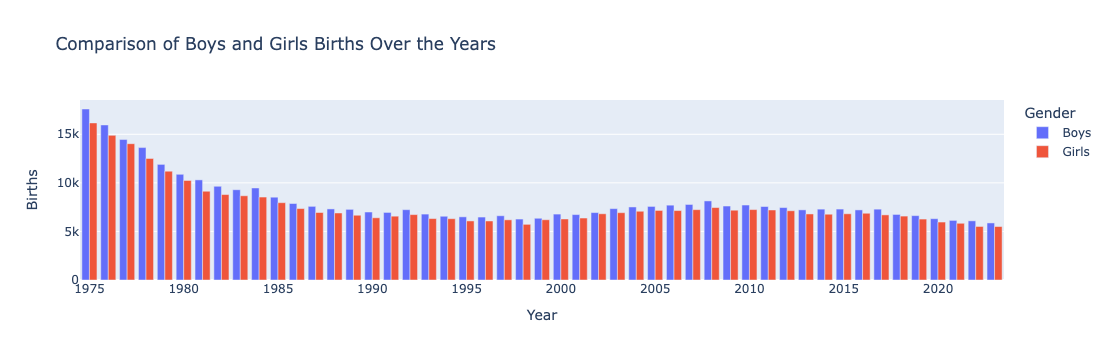

In [80]:
# Plotly Interactive Bar Chart
fig = px.bar(b_melted, x="Year", y="Births", color="Gender", barmode="group",
             title="Comparison of Boys and Girls Births Over the Years")
fig.show()

In [91]:
centers = pd.read_csv('../Final Project/datasets/BD_Final Project - Centres_Professors_infantil_primaria.csv')

In [92]:
centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Curs                15 non-null     object
 1   Centres_Públics     15 non-null     int64 
 2   Centres_Privats     15 non-null     int64 
 3   Centres_Total       15 non-null     int64 
 4   Professors_Públics  15 non-null     int64 
 5   Professors_Privats  15 non-null     int64 
 6   Professors_Total    15 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 972.0+ bytes


In [93]:
centers.head()

,Curs,Centres_Públics,Centres_Privats,Centres_Total,Professors_Públics,Professors_Privats,Professors_Total
0,2022/2023,408,440,848,8904,7793,16697
1,2021/2022,401,448,849,8641,7902,16543
2,2020/2021,400,468,868,8197,8297,16494
3,2019/2020,392,487,879,8126,8482,16608
4,2018/2019,389,488,877,8111,8572,16683


In [94]:
centers.shape

(15, 7)

In [95]:
centers.isnull().sum()

Curs                  0
Centres_Públics       0
Centres_Privats       0
Centres_Total         0
Professors_Públics    0
Professors_Privats    0
Professors_Total      0
dtype: int64

In [97]:
centers.nunique()

Curs                  15
Centres_Públics       11
Centres_Privats       14
Centres_Total         13
Professors_Públics    15
Professors_Privats    15
Professors_Total      15
dtype: int64

In [98]:
centers.tail()

,Curs,Centres_Públics,Centres_Privats,Centres_Total,Professors_Públics,Professors_Privats,Professors_Total
10,2012/2013,382,462,844,7134,8119,15253
11,2011/2012,379,473,852,7388,8313,15701
12,2010/2011,347,465,812,7196,8252,15448
13,2009/2010,341,473,814,7033,8377,15410
14,2008/2009,331,471,802,7041,8360,15401


In [99]:
centers['Centres_Públics'].unique()

array([408, 401, 400, 392, 389, 386, 382, 379, 347, 341, 331])

In [100]:
centers['Centres_Privats'].unique()

array([440, 448, 468, 487, 488, 486, 490, 491, 507, 445, 462, 473, 465,
       471])

In [101]:
centers['Centres_Total'].unique()

array([848, 849, 868, 879, 877, 875, 893, 831, 844, 852, 812, 814, 802])